# About Dataset

# Credit Card Fraud Detection Dataset 2023

**Unlocking Security:**  Unveil Patterns, Safeguard Transactions

**Author of dataset** : Nidula Elgiriyewithana

# Description:

This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and
the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development 
of fraud detection algorithms and models to identify potentially fraudulent transactions.

# Key Features:

**id:** Unique identifier for each transaction


**V1-V28:** Anonymized features representing various transaction attributes (e.g., time, location, etc.)


**Amount:** The transaction amount



**Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)

# Potential Use Cases:

**Credit Card Fraud Detection:** Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.


**Merchant Category Analysis:** Examine how different merchant categories are associated with fraud.

    
**Transaction Type Analysis:** Analyze whether certain types of transactions are more prone to fraud than others.

# Data Source:

Data Source: The dataset was collected from credit card transactions made by European cardholders in 2023, with sensitive information 
    removed to ensure privacy and compliance with ethical guidelines.

In [1]:
# import important libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn



# Step 1: Load and Inspect the Data


In [2]:
# First, load the dataset and take an initial look at the data structure to understand its components
import pandas as pd

# loead the dataset 
data = pd.read_csv('credit_card.csv',sep=',')

# Overview of the data 
print(data.head())
print(data.info())
print(data.describe())

   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [3]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
data.describe()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


# Step 2: Exploratory Data Analysis (EDA)

# 2.1 Visualize Class Imbalance

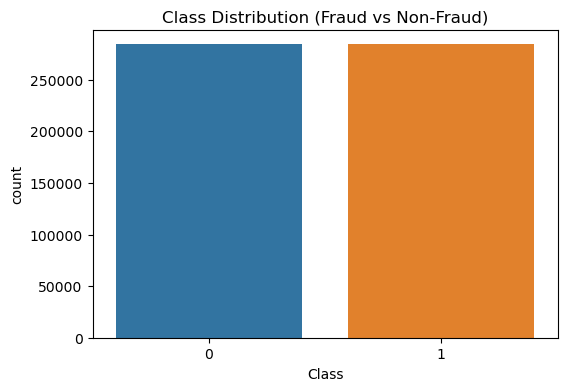

In [5]:
# Fraud detection datasets are typically imbalenced, so visualize the distribution of classes.
import seaborn as sns 
import matplotlib.pyplot as plt 

# Plot class distribution 
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


In [6]:
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

This shows that the **Class feature** is balanced since there is the same number of **fraud (1)** and **non-fraud (0)** transactions

# 2.2 Check for Missing Values

In [7]:
# Look for missing values, as they may need handling
# Check for missing values

data.isnull()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values or missing values in the dataset 

# 2.3 Correlation Heatmap

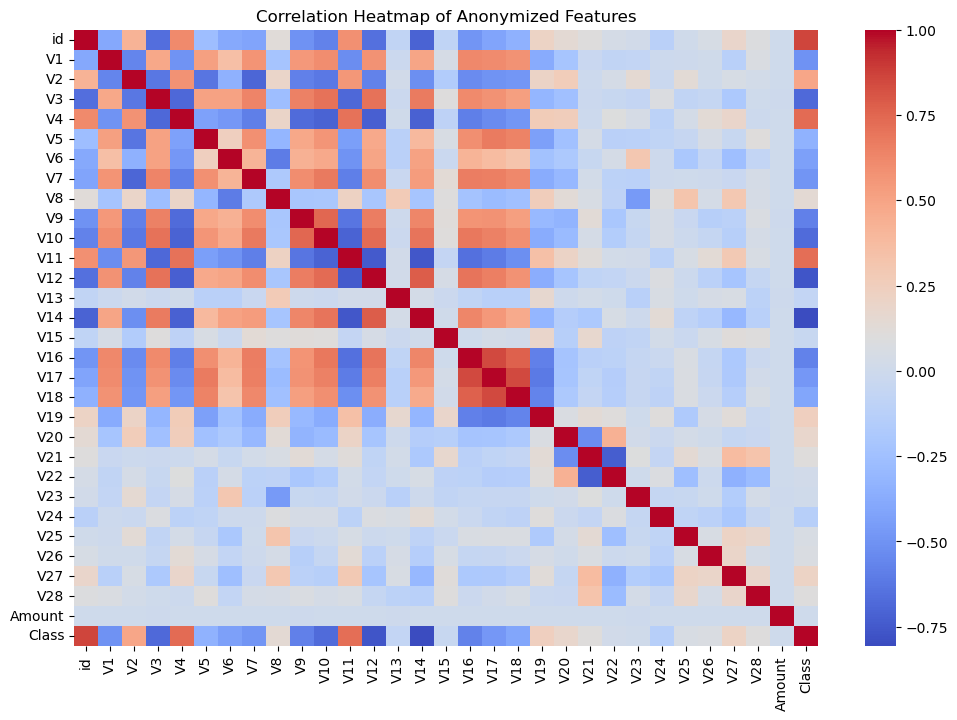

In [9]:
# Identify correlations among the anonymized features and the target label.
import numpy as np

# correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Anonymized Features')
plt.show()

# Observations from the heatmap 

class and V4 are highly correlated


class and id are highly correlated 


class and V14 are negatively correlated


class and V12 are negatively correlated


class and V3 are negatively correlated

# Step 3: Data Preprocessing

# 3.1 Normalize the Amount Column

In [10]:
# Since the amount could vary widely 
# According to the statistical analysis done earlier it showed how the highest and lowest values 
# in amaount were widely apart. 

from sklearn.preprocessing import StandardScaler 

# Standardize the amount feature
sc = StandardScaler()
data['Amount'] = sc.fit_transform(data['Amount'].values.reshape(-1,1))

# 3.2 Split the Data

In [11]:
# Separate the target variable and split the data into training and testing sets 
from sklearn.model_selection import train_test_split 

# target variable 
y = data['Class']

In [12]:
# Features
 #drop classs# as it is the target variable and id as it is irrelevant 
X = data.drop(columns=['Class', 'id'])

In [ ]:
y

In [ ]:
X

In [13]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

# Step 4: Model Training and Evaluation

# 4.1 Choosing the Models

Popular algorithms for fraud detection include:

- Random Forest for interpretability and handling imbalance.

- XGBoost for high-performance gradient boosting.

- Neural Network for flexibility, though it may require more tuning.

# 4.2 Using Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix 

# Train the model 
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Predict and evaluate 
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print("ROC_AUC", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC_AUC 0.9998124157336303


# 4.3 Model Evaluation with Confusion Matrix and ROC Curve

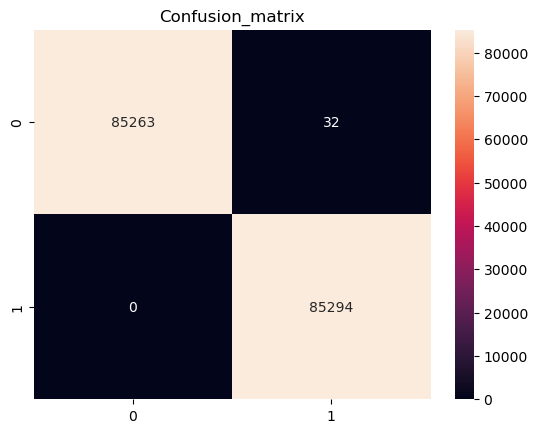

In [15]:
# Since fraud detection is an imbalanced problem, use precision, recall, and AUC for evaluation 
from sklearn.metrics import roc_curve, auc 

# Confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion_matrix")
plt.show()




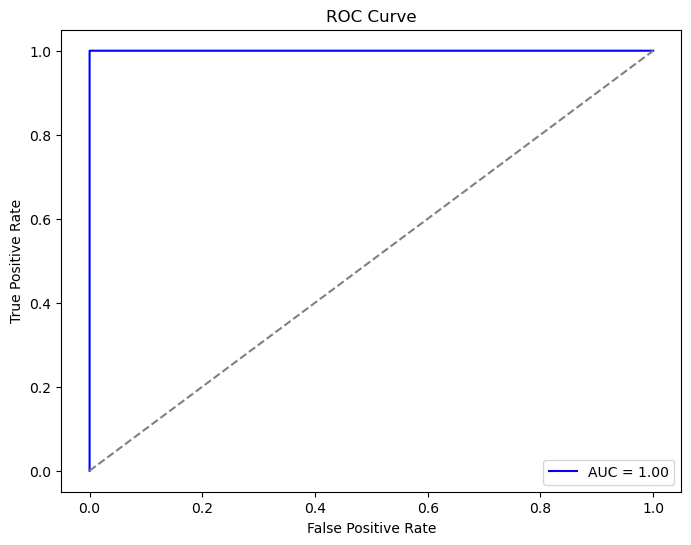

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="grey", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# 4.4 Using XGBoost for Comparison

In [ ]:
# pip install xgboost


In [17]:
# Using XGBoost, which often performs well on imbalanced data
from xgboost import XGBClassifier

# Train XGBoost 
xgb = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)



C:\Users\cyril\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:01:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [18]:
# Predict and evaluate 
y_pred_xgb = xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC AUC Score: 0.9995017292924556


# Step 5: Hyperparameter Tuning

In [19]:
# Using RandomisedSearchCV

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Adjust the grid and use RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

random_search = RandomizedSearchCV(
    rf, param_grid, scoring='roc_auc', cv=3, n_iter=5, random_state=42 ,n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC:", random_search.best_score_)


Best parameters: {'n_estimators': 200, 'max_depth': 15}
Best ROC AUC: 0.9999773633315036


In [ ]:
# I used n_jobs because the normal cpu was running very slow 

In [20]:
# use GridSearchCV or RandomizedSearchCV to optimize model parameters.
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
# grid_search = GridSearchCV(rf, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)




# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)


Best parameters: {'max_depth': 15, 'n_estimators': 200}
Best ROC AUC: 0.9999773633315036


 Also I had use both RandomizedCV and GridSearchCV to compare and see which one gives me the best parameters

In [21]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

# Step 6: Deployment Preparation

In [22]:
# After identifying the best model, prepare it for deployment by saving the model 

import joblib 

# Save the model 
joblib.dump(grid_search.best_estimator_, 'best_fraud_model.pkl')

['best_fraud_model.pkl']

# Performing Merchant Category Analysis

To perform a Merchant Category Analysis on your credit card fraud detection dataset, we’ll first look into any categorical information related to merchant types,
which will require identifying whether the dataset has a column that categorizes transactions by merchant type or if we need to create representative features 
using the anonymized data (V1-V28) and transaction amounts. Here’s a step-by-step approach to conducting this analysis

# Step 1: Load and Prepare the Data

In [ ]:
#Ensure that your data is clean, with no missing values or anomalies. Since the dataset is anonymized, 
# we will start by exploring patterns within the features and understanding their distributions.
#

In [23]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# load the dataset 
df = pd.read_csv('credit_card.csv')

# Basi information and summary 
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

# Step 2: Identify Merchant Categories

If the dataset has a categorical variable representing merchant types, we can proceed with it directly. However, if merchant information is not directly available, 
we may need to segment transactions by patterns in the anonymized features (V1-V28) and transaction amount.

If there’s no direct merchant category, we can create clusters using the transaction features (V1 to V28 and Amount) to approximate merchant categories.This 
clustering process uses unsupervised learning to segment transactions into groups that may represent different merchant categories.

In [24]:
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

# Select relevant features
features = data[['V1', 'V2', 'V3', 'Amount']]   # You can add more columns if you want

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering to create categories (try different n_clusters for optimal results)
kmeans = KMeans(n_clusters=5, random_state=42)
df['merchant_category'] = kmeans.fit_predict(scaled_features)

In [35]:
df['merchant_category']

0         2
1         4
2         4
3         2
4         2
         ..
568625    4
568626    4
568627    3
568628    4
568629    3
Name: merchant_category, Length: 568630, dtype: int32

In [36]:
df['merchant_category'].value_counts()

4    166609
3    136249
0    106747
2     97659
1     61366
Name: merchant_category, dtype: int64

In [37]:
features

,V1,V2,V3,Amount
0,-0.260648,-0.469648,2.496266,0.858447
1,0.985100,-0.356045,0.558056,-0.796369
2,-0.260272,-0.949385,1.728538,-1.377011
3,-0.152152,-0.508959,1.746840,-0.962119
4,-0.206820,-0.165280,1.527053,0.323285
...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,-1.105231
568626,-0.670459,-0.202896,-0.068129,-1.067766
568627,-0.311997,-0.004095,0.137526,1.666401
568628,0.636871,-0.516970,-0.300889,-0.271853


# Step 3: Visualize Fraud Rates by Merchant Category

Now that we have a merchant category (either original or clustered), we can analyze fraud prevalence within each category.

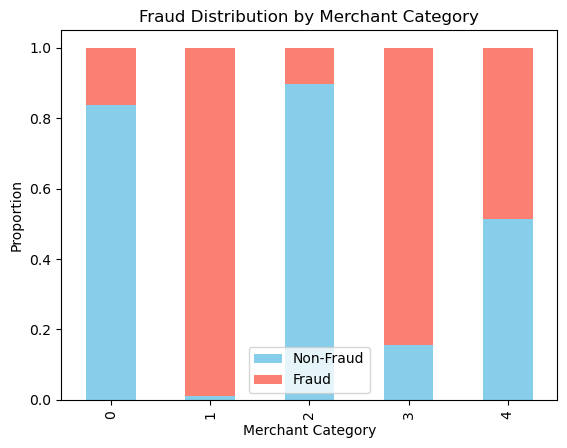

In [28]:
# Plot fraud distribution by merchant category 
fraud_counts = df.groupby('merchant_category')['Class'].value_counts(normalize=True).unstack()
fraud_counts.columns = ['Non-Fraud', 'Fraud']

fraud_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Fraud Distribution by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Proportion')
plt.show()


# Step 4: Explore Transaction Amount by Category

Analyzing transaction amounts by category helps identify whether certain merchant types are associated with higher transaction amounts and, consequently, a 
higher likelihood of fraud.

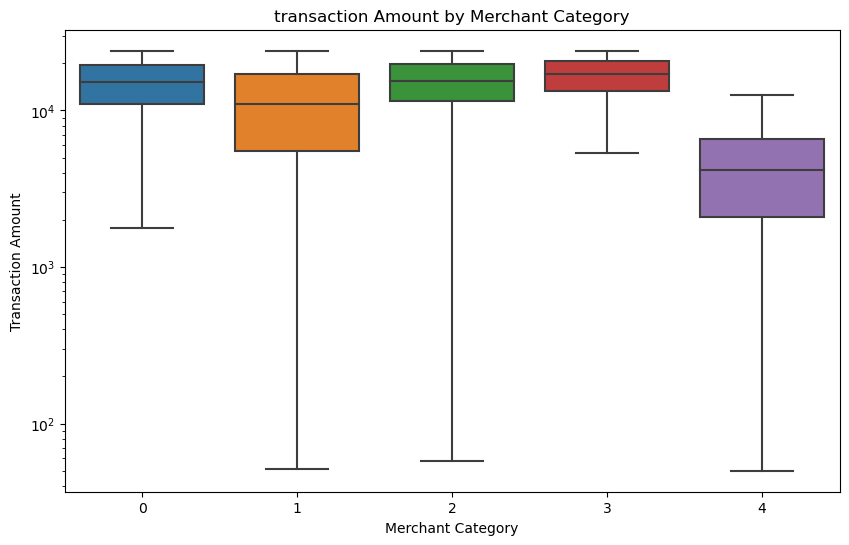

In [34]:
# Boxplot of transaction amount by merchant category 
plt.figure(figsize=(10,6))
sns.boxplot(x='merchant_category', y='Amount', data=df)
plt.title('transaction Amount by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale for better visualization
plt.show()

In [38]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,merchant_category
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0,2
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0,4
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0,4
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0,2
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1,4
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1,4
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1,3
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1,4


In [39]:
df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [40]:
df['Class'].mean()

0.5

In [43]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,merchant_category
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0,568630.000000
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5,2.342238
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5,1.467418
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0,0.000000
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0,1.000000
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5,3.000000
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0,4.000000
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0,4.000000


In [44]:
# Note that for the class column, the mean and meadian are the same which is (0.5)

In [42]:
 df.groupby('merchant_category')['Class'].mean()

merchant_category
0    0.163143
1    0.990337
2    0.101691
3    0.844043
4    0.487345
Name: Class, dtype: float64

In [46]:
df.groupby('merchant_category')['Class'].value_counts()

merchant_category  Class
0                  0         89332
                   1         17415
1                  1         60773
                   0           593
2                  0         87728
                   1          9931
3                  1        115000
                   0         21249
4                  0         85413
                   1         81196
Name: Class, dtype: int64

# Step 5: Analyze Fraud Proportion by Merchant Category

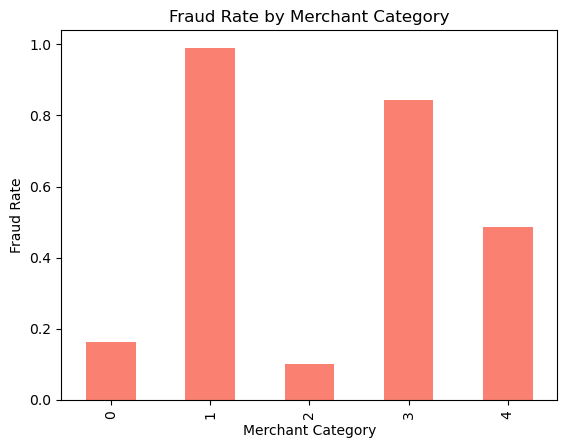

In [45]:
# Calculate the fraud rate for each category to see if some are more vulnerable to fraud than others. 
# Fraud rate by merchant category 

fraud_rate = df.groupby('merchant_category')['Class'].mean()
fraud_rate.plot(kind='bar', color='salmon')
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.show()


Merchant Category(1): has the highest number fraud transactions 


Merchant Category(3): has the second highest number of fraud transactions
    


Merchant Category(2) : has the lowest number of fraud transactions

In [47]:
df.groupby('merchant_category')['Class'].value_counts()

merchant_category  Class
0                  0         89332
                   1         17415
1                  1         60773
                   0           593
2                  0         87728
                   1          9931
3                  1        115000
                   0         21249
4                  0         85413
                   1         81196
Name: Class, dtype: int64

# Step 6: Correlation Analysis within Each Category

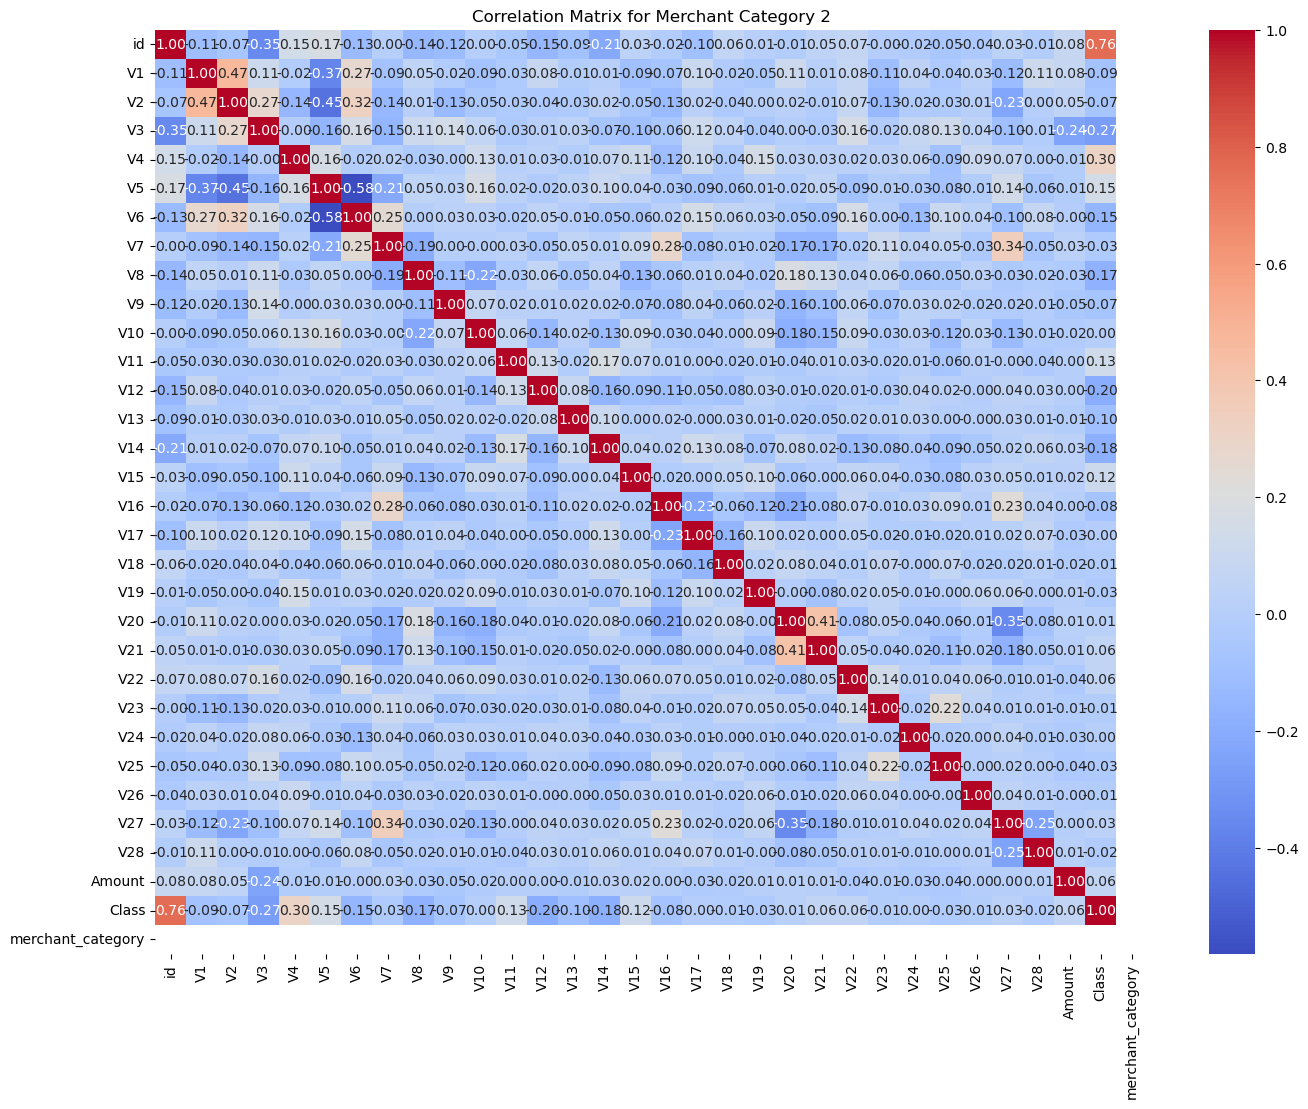

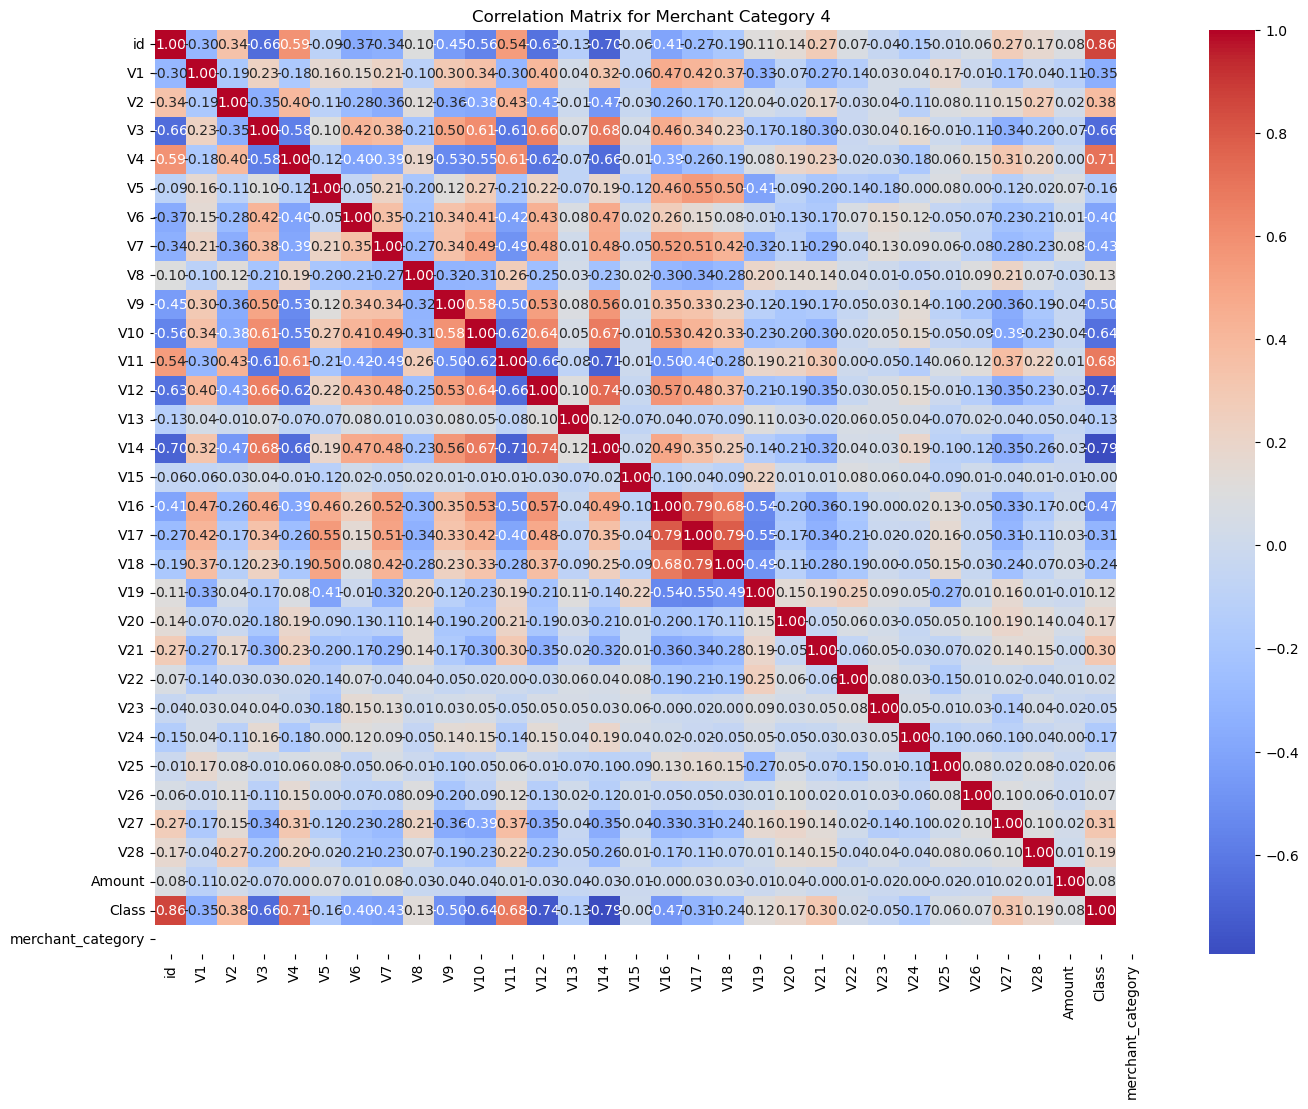

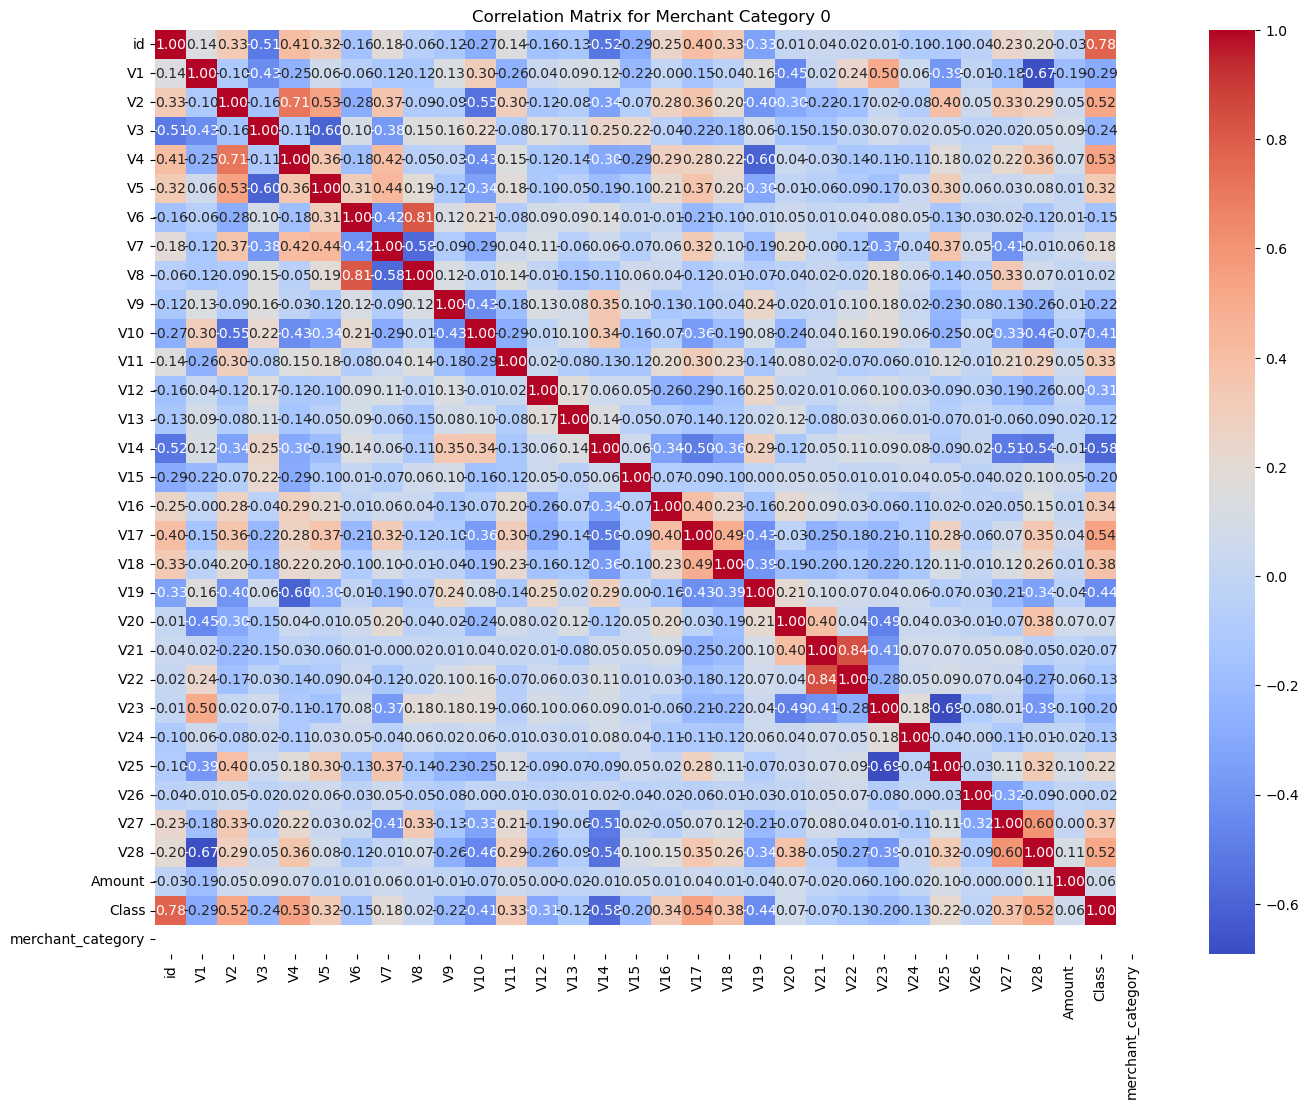

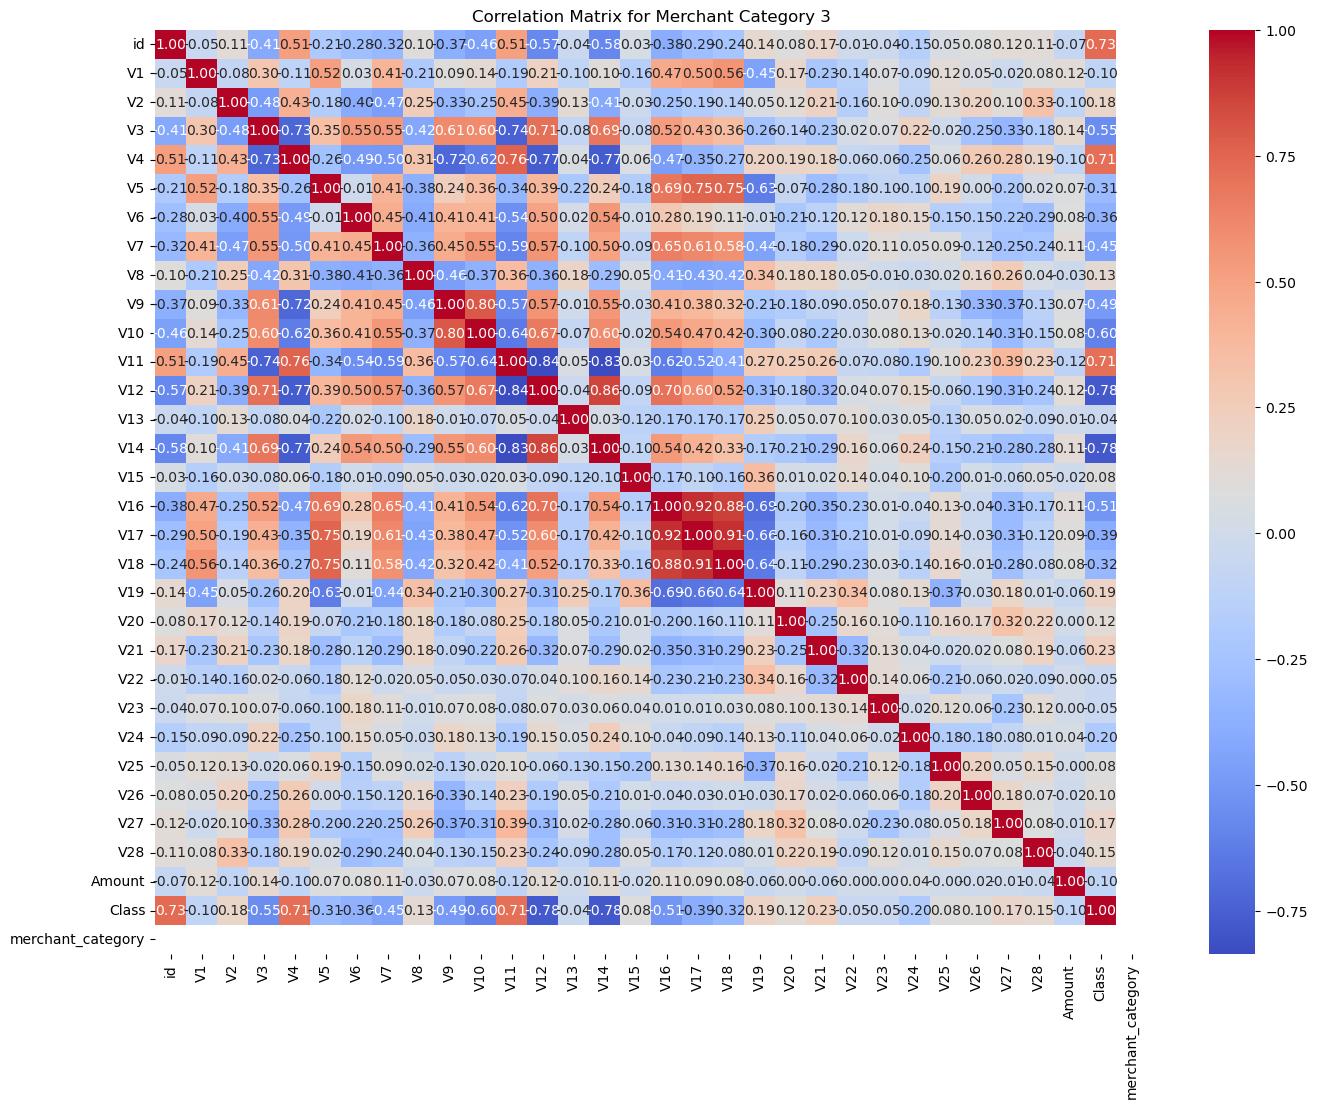

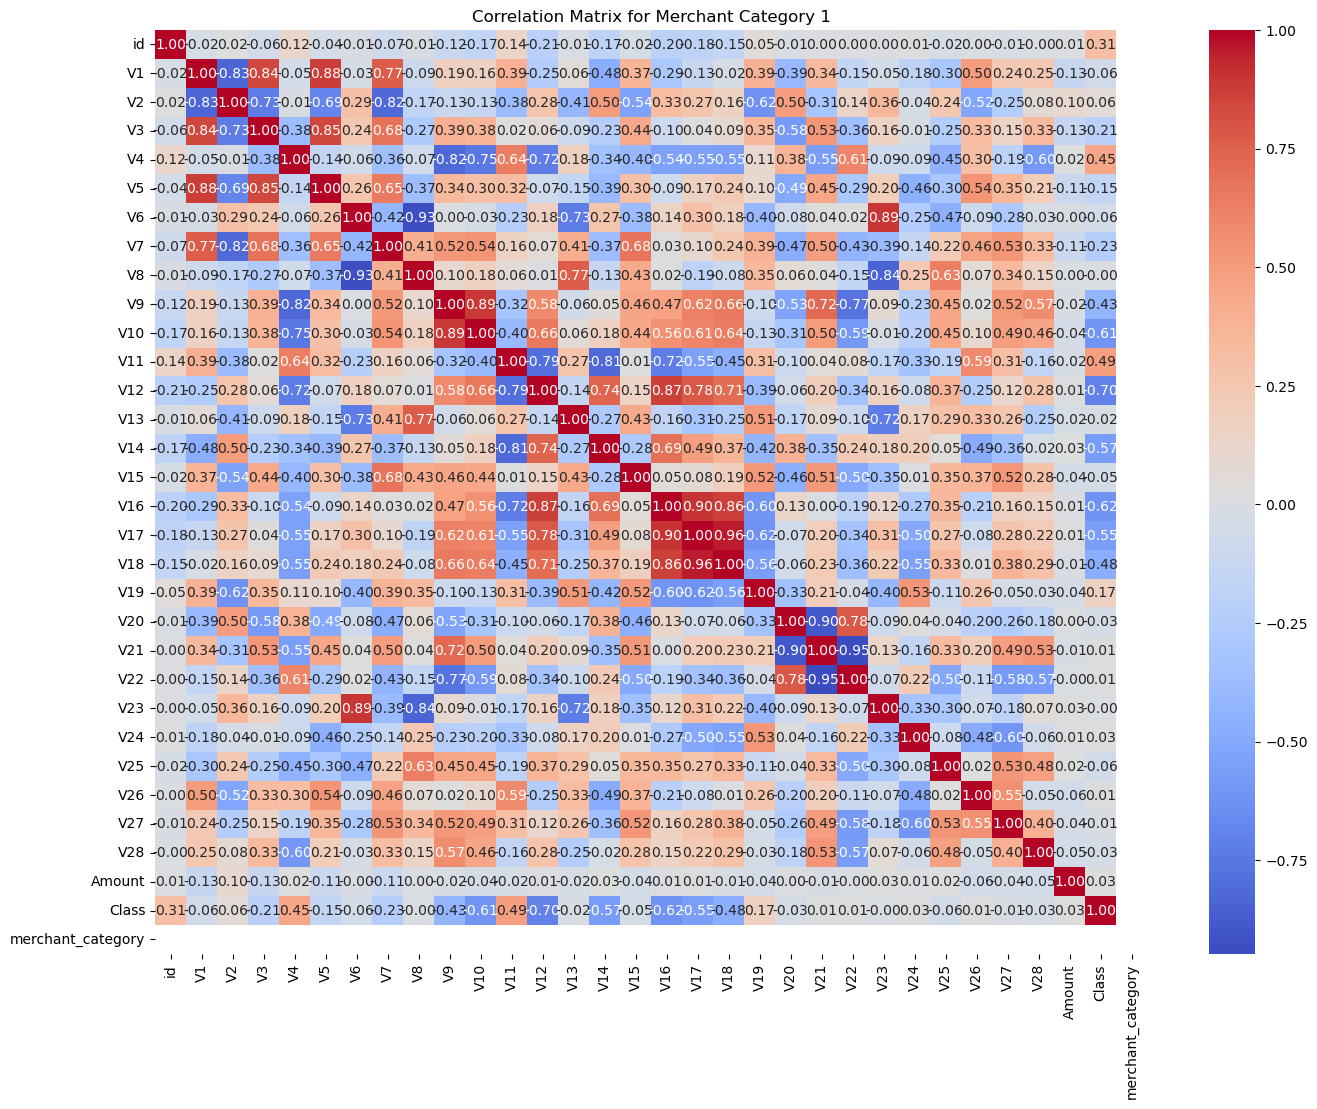

In [52]:
# Examine within each category to see if certain patterns are strongly associated with fraud in particular merchant types.

import numpy as np 

# Example: Correlation heatmap for each merchant types. 
for category in df['merchant_category'].unique():
    category_df = df[df['merchant_category'] ==category] 
    corr_matrix = category_df.corr()
    
    plt.figure(figsize=(16,12))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f" , cmap='coolwarm')
    plt.title(f"Correlation Matrix for Merchant Category {category}")

In [53]:
df['merchant_category']

0         2
1         4
2         4
3         2
4         2
         ..
568625    4
568626    4
568627    3
568628    4
568629    3
Name: merchant_category, Length: 568630, dtype: int32

In [54]:
df['merchant_category'].unique()

array([2, 4, 0, 3, 1])

In [ ]:
#Examine correlations within each category to see if certain patterns are strongly associated with 
# fraud in particular merchant types.

import numpy as np

# Example: Correlation heatmap for each merchant category
for category in data['merchant_category'].unique():
    category_data = data[data['merchant_category'] == category]
    corr_matrix = category_data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f'Correlation Matrix for Merchant Category {category}')
    plt.show()


# Step 7: Insights and Interpretations

Summarize key observations, such as:

- Which categories show a higher rate of fraud?

- Are there distinct patterns in transaction amounts or correlation structures within fraud-prone categories?

- Based on these findings, make recommendations for monitoring or preventative actions.

This merchant category analysis provides insights into fraud trends within transaction types, helping to focus fraud detection efforts more effectively. Let me 
know if you need further explanation or specific details on any step!

# Performing Transaction Type Analysis

Transaction Type Analysis in the context of credit card fraud detection dataset involves examining the characteristics of different types of transactions and how they relate to fraud. This analysis can reveal if certain transaction types are more susceptible to fraudulent activity. 
This is how to proceed.

1. **Transaction Patterns:**  We might infer transaction types by analyzing patterns in the anonymized features (e.g., V1-V28, Amount).

2. **Fraud Analysis by Transaction Amount:** Since the Amount field is available, we can investigate if certain transaction values are more frequently fraudulent.

3. **Frequency and Pattern Analysis:** We can explore the distribution of transactions, and examine outliers in feature patterns that may indicate certain transaction behaviors.

# Step 1: Load and Explore the Data

In [56]:
# Load the dataset and get a sense of basic statistics for transaction types, if available, or prepare for pattern-based categorizat

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Load the dataset 
dfs = pd.read_csv('credit_card.csv')

 # Display basic info and check for null values 
print(dfs.info())
print(dfs.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

when set of values have their mean to be 0 and their standard deviation to be 1 what does it mean




**If a set of values has a mean of 0, a median of 0, and a standard deviation of 1,** it suggests that the 
data is **standardized or normalized.** This is a common step in data preprocessing, particularly in machine learning, where each feature is adjusted to have:

**Mean = 0:** Centering the data around zero removes any offset or shift in the data, making it 
easier to compare values relative to zero.

**Standard Deviation = 1:** Scaling the data to have a unit standard deviation means each value represents the number of standard deviations away from the mean. This helps to make different features comparable, especially when they are on different scales.

**This type of transformation is typical for data that has undergone z-score normalization (or standardization)**, where each value is transformed using the formula:

In [79]:
# Load the dataset and get a sense of basic statistics for transaction types, if available, or prepare for pattern-based categorizat

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Load the dataset 
dfs1 = pd.read_csv('credit_card.csv')

 # Display basic info and check for null values 
print(dfs1.info())
print(dfs1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

# Step 2: Segment Transactions by Amount Ranges

# Step 3: Analyze Fraud Distribution by Transaction Amount Category

In [80]:
# Create amount bins to categorize transaction types by amount range
bins = [0, 50, 200, 500, 20000, dfs1['Amount'].max()]
labels = ['Micro', 'Small', 'Medium', 'Large', 'Very Large']

# Use pd.cut to assign categories
dfs1['Amount_Category'] = pd.cut(dfs1['Amount'], bins=bins, labels=labels, include_lowest=True)

# View the distribution of amount categories
print(dfs1['Amount_Category'].value_counts())

# Explore whether certain transaction amount categories have a higher incidence of fraud

# Group by Amount_Category, calculate value counts for 'Class' (fraud or non-fraud), and normalize
fraud_counts1 = dfs1.groupby('Amount_Category')['Class'].value_counts(normalize=True).unstack(fill_value=0)

# Ensure the columns are labeled correctly
fraud_counts1.columns = ['Non-Fraud', 'Fraud']

# Plot fraud distribution by amount category
fraud_counts1.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Fraud Distribution by Transaction Amount Category')
plt.xlabel('Transaction Amount Category')
plt.ylabel('Proportion')
plt.show()


Large         462206
Very Large     95635
Medium          7260
Small           3529
Micro              0
Name: Amount_Category, dtype: int64


ValueError: operands could not be broadcast together with shape (5,) (4,)

# Step 4: Analyzing Patterns in Anonymized Features (V1-V28)

In [84]:
# If no explicit transaction types are present, analyze clusters in anonymized features (V1-V28) to infer 
# different types of transactions.

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the anonymized features for clustering
features = dfs1[['V1', 'V2', 'V3', 'V4', 'V5']]  # Adjust based on your analysis
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use KMeans to segment transactions (try various n_clusters for optimal results)
kmeans = KMeans(n_clusters=5, random_state=42)
dfs1['transaction_type'] = kmeans.fit_predict(scaled_features)

# Step 5: Fraud Rate by Transaction Type (Cluster-Based)

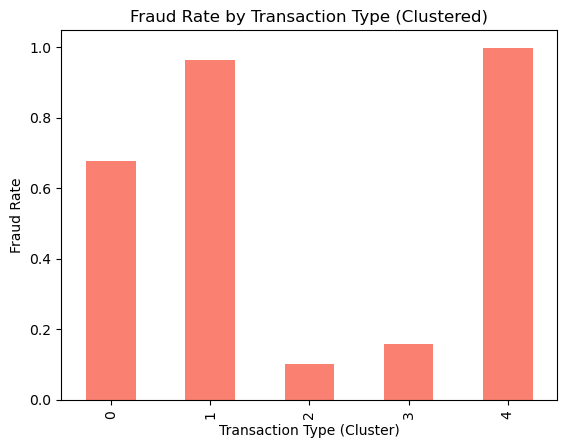

In [85]:
# Once we’ve inferred transaction types via clustering, analyze the fraud rates within each cluster to 
# determine if certain transaction patterns are more fraud-prone.

# Plot fraud rate by transaction type (clustered)
fraud_rate = dfs1.groupby('transaction_type')['Class'].mean()
fraud_rate.plot(kind='bar', color='salmon')
plt.title('Fraud Rate by Transaction Type (Clustered)')
plt.xlabel('Transaction Type (Cluster)')
plt.ylabel('Fraud Rate')
plt.show()

# Step 6: Visualize Transaction Features for Each Cluster

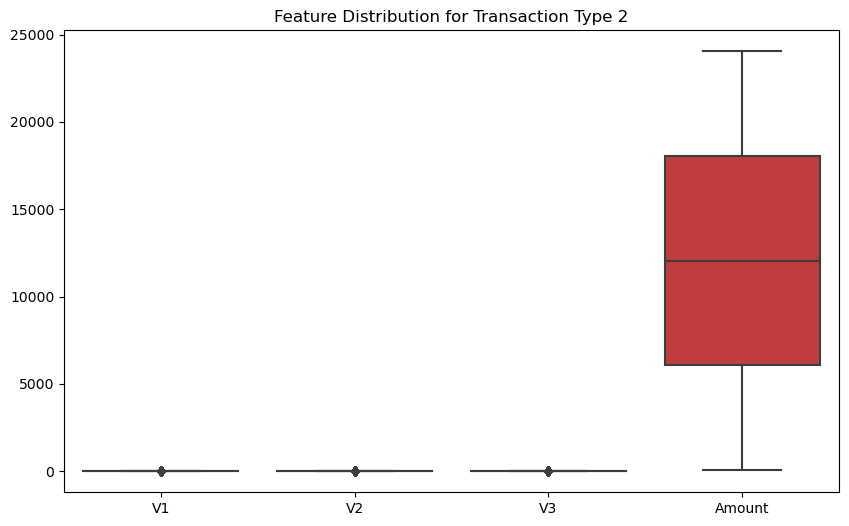

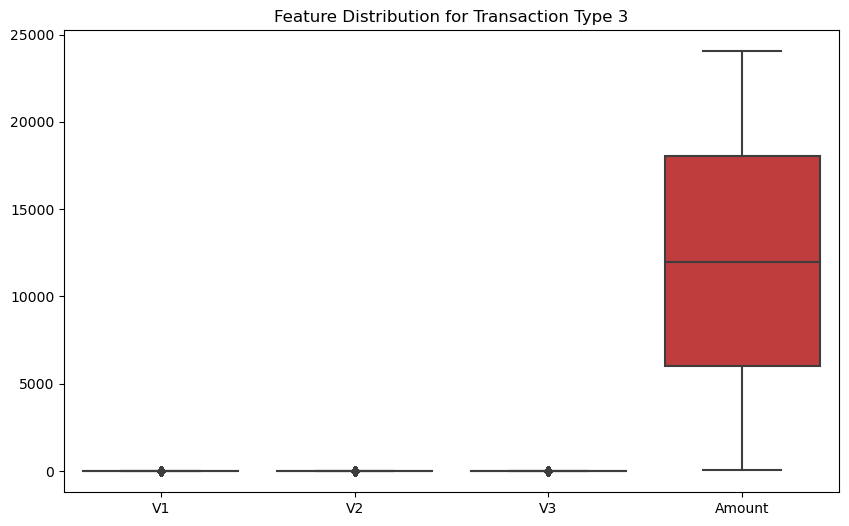

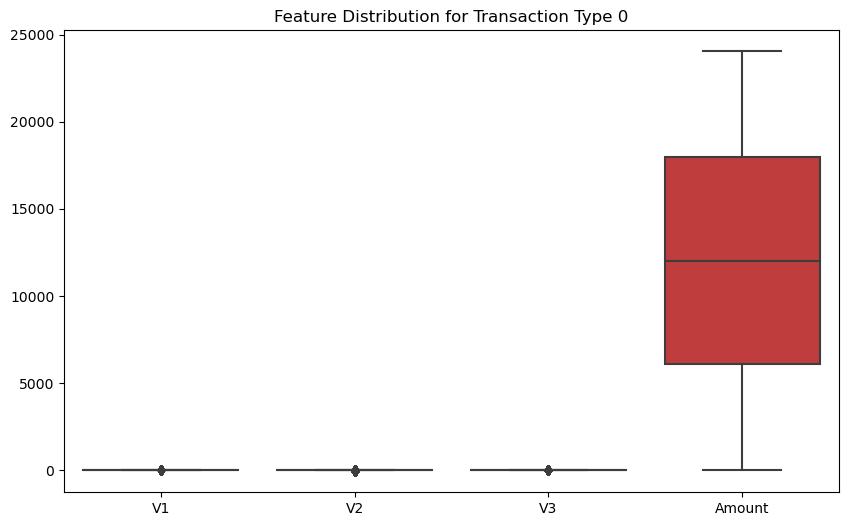

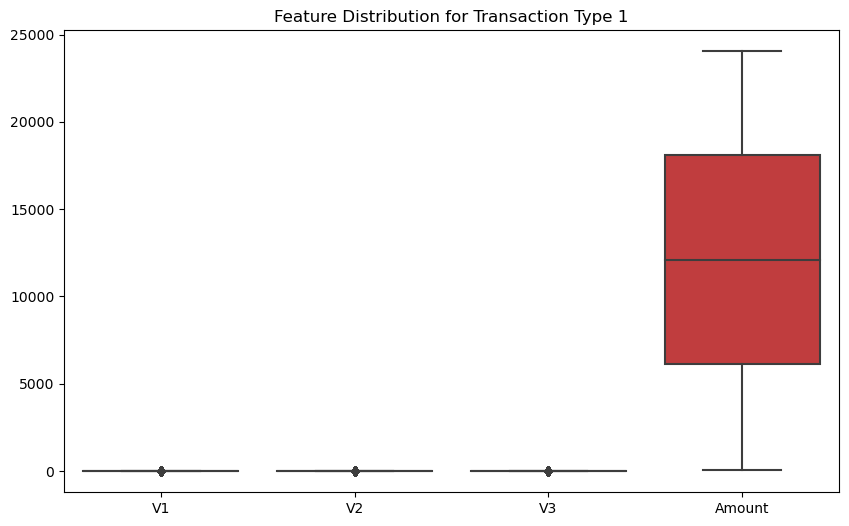

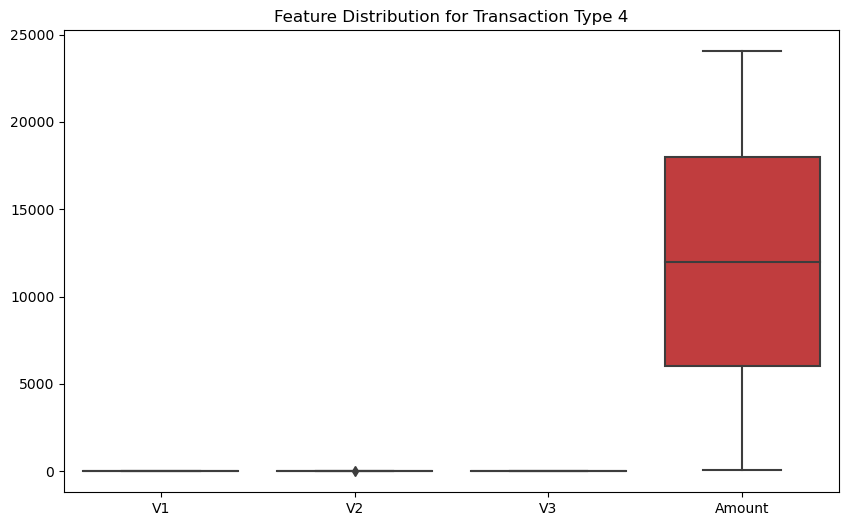

In [87]:
# to gain insights into what characterizes each inferred transaction type, visualize feature distributions
# for each cluster.

import numpy as np

# Visualize feature distributions within each transaction type
for transaction_type in dfs1['transaction_type'].unique():
    cluster_dfs1 = dfs1[dfs1['transaction_type'] == transaction_type]
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=cluster_dfs1[['V1', 'V2', 'V3', 'Amount']])  # Select relevant features
    plt.title(f'Feature Distribution for Transaction Type {transaction_type}')
    plt.show()
